In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymongo
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from pprint import pprint

In [2]:
# Set up splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Initialise PyMongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [4]:
# Define database and collection
db = client.mars_weather_db
collection = db.articles

In [5]:
# Mars Weather Website to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [6]:
#Scrap table from Mars Weather Site.
table = pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
#Convert the table into a Dataframe
mars_weather_df = table[0]
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
#Find the datatype and convert to datetime
data_type = mars_weather_df.dtypes
print(data_type)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [9]:
mars_weather_df["terrestrial_date"]=pd.to_datetime(mars_weather_df['terrestrial_date'], dayfirst=True)
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
#Check datatype after conversion
data_type = mars_weather_df.dtypes
print(data_type)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


Question 1: how many months are there on Mars?

In [11]:
Mars_months = mars_weather_df['month'].max()
Mars_months

12

Question 2: how many Martian (not Earth) days' worth of data are there in the scraped dataset?

In [12]:
mars_weather_df['sol'].count()

1867

Question 3: what are the coldest and warmest months on Mars (at the location of Curiosity)? Obtain the answer by averaging the minimum daily temperature of each month. Plot the results as a bar plot.

In [13]:
min_temp_df=mars_weather_df.groupby("month").mean()
min_temp_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


Text(0.5, 1.0, 'Mars Months Vs Minimum Temperature')

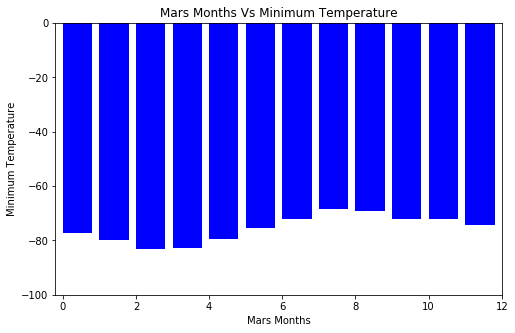

In [47]:
#Plot bar chart
x_axis = np.arange(len(min_temp_df))
plt.figure(figsize=(8,5))
plt.xlim([-0.2,12])
plt.ylim([-100,0])
plt.bar(x_axis, min_temp_df["min_temp"], color='b', align='edge')
plt.ylabel("Minimum Temperature")
plt.xlabel("Mars Months")
plt.title("Mars Months Vs Minimum Temperature")

The coldest month on Mars is month 3 with an average of -83.3°C while the warmest month is month 8 with an average of -68.4°C.

Question 4: Answer the following question: which months have the lowest and highest atmospheric pressure on Mars? Obtain the answer by averaging the daily atmospheric pressure of each month. Plot the results as a bar plot.

Text(0.5, 1.0, 'Mars Months Vs Atmospheric Pressure')

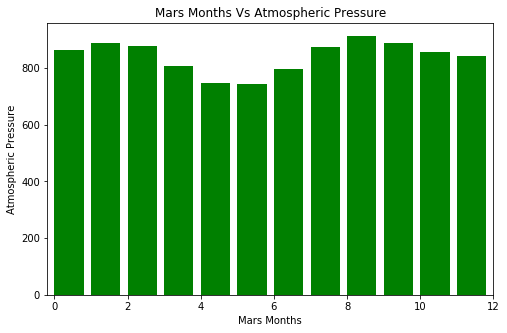

In [48]:
#Plot Bar Chart
plt.figure(figsize=(8,5))
plt.xlim([-0.2,12])
plt.bar(x_axis, min_temp_df["pressure"], color='g', align='edge')
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Mars Months")
plt.title("Mars Months Vs Atmospheric Pressure")

Month 9 has the highest average pressure on Mars with 913.3 while Month 6 has the lowest with an average of 745.0

Question 5: Approximately how many terrestrial (earth) days are there in a Martian year? In other words, in the time that Mars circles the Sun once, how many days elapse on the Earth? Estimate the result visually by plotting the daily minimum temperature.

Text(0.5, 0, 'Terrestrial Date')

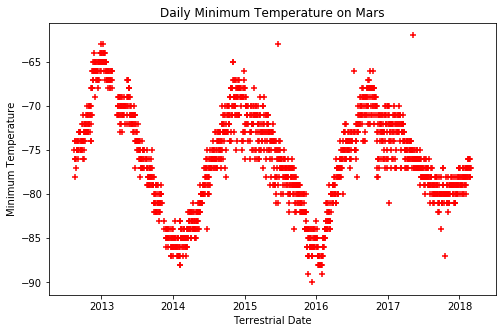

In [50]:
#Plot Scatter
plt.figure(figsize=(8,5))
plt.scatter(mars_weather_df["terrestrial_date"], mars_weather_df["min_temp"], marker="+", color="red")
plt.title("Daily Minimum Temperature on Mars")
plt.ylabel("Minimum Temperature")
plt.xlabel("Terrestrial Date")

It can be observed that the pattern of the Minimum Temperature repeats around every two years on Earth. It is possible to say that a Mars's Year is around 2 Years on Earth.

In [21]:
# Exporting file as a CSV
mars_weather_df.to_csv("mars_weather.csv", index=False, header=True)

In [22]:
browser.quit()